In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import graphviz
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
matplotlib.rc("font", family = "Malgun Gothic")
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
df_raw = pd.read_csv("BOSTON_HOUSING.csv")
df_raw.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


In [4]:
#결측치 확인
df_raw.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

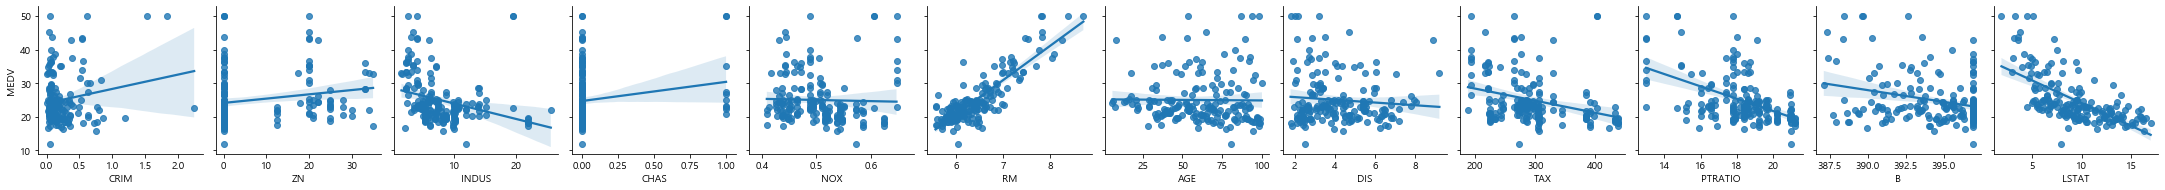

In [116]:
#그래프 분석
sns.pairplot(df_raw, y_vars = "MEDV", x_vars = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT"], kind = "reg")

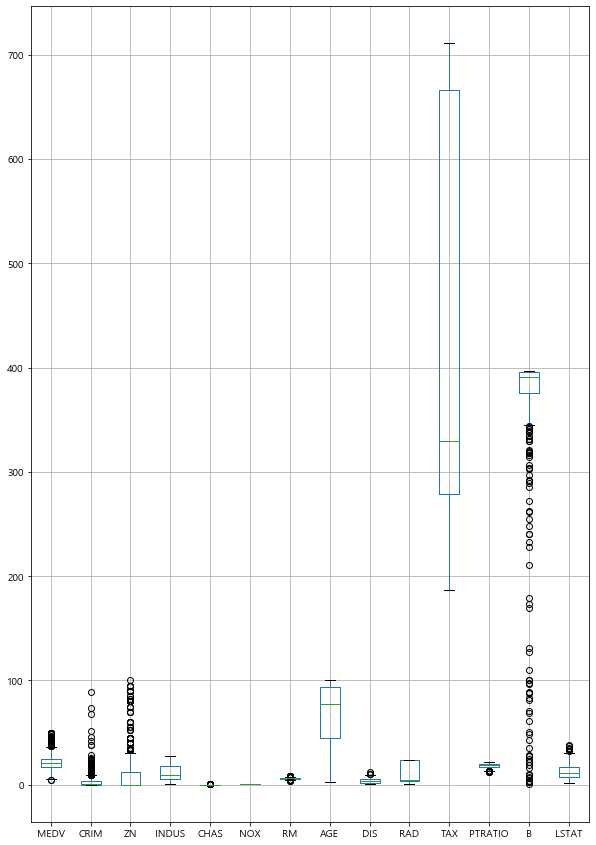

In [113]:
#이상치 찾기
df_raw.boxplot(figsize = (10,15))

In [6]:
df_cat = df_raw["CHAS"]
df_num = df_raw[["MEDV","CRIM","ZN","INDUS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]]

In [7]:
v_feature_name = df_num.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.159686,-0.419782,0.284830,-1.287910,-0.144218,0.413672,-0.120014,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.101524,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303095,0.441052,-0.492439
2,1.324247,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303095,0.396427,-1.208727
3,1.182758,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,1.487503,-0.412482,-0.487722,-1.306878,-0.835284,1.228576,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [9]:
n_df = pd.concat([df_raw["CHAS"], df_scaled], axis = 1)
n_df.head()

,CHAS,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.159686,-0.419782,0.284830,-1.287910,-0.144218,0.413672,-0.120014,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,0,-0.101524,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303095,0.441052,-0.492439
2,0,1.324247,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303095,0.396427,-1.208727
3,0,1.182758,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,0,1.487503,-0.412482,-0.487722,-1.306878,-0.835284,1.228576,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [13]:
df_dummy = pd.get_dummies(n_df)
df_dummy = df_dummy.round(3)
df_dummy.head()

,CHAS,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.160,-0.420,0.285,-1.288,-0.144,0.414,-0.120,0.140,-0.983,-0.667,-1.459,0.441,-1.076
1,0,-0.102,-0.417,-0.488,-0.593,-0.740,0.194,0.367,0.557,-0.868,-0.987,-0.303,0.441,-0.492
2,0,1.324,-0.417,-0.488,-0.593,-0.740,1.283,-0.266,0.557,-0.868,-0.987,-0.303,0.396,-1.209
3,0,1.183,-0.417,-0.488,-1.307,-0.835,1.016,-0.810,1.078,-0.753,-1.106,0.113,0.416,-1.362
4,0,1.488,-0.412,-0.488,-1.307,-0.835,1.229,-0.511,1.078,-0.753,-1.106,0.113,0.441,-1.027


<AxesSubplot:>

C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


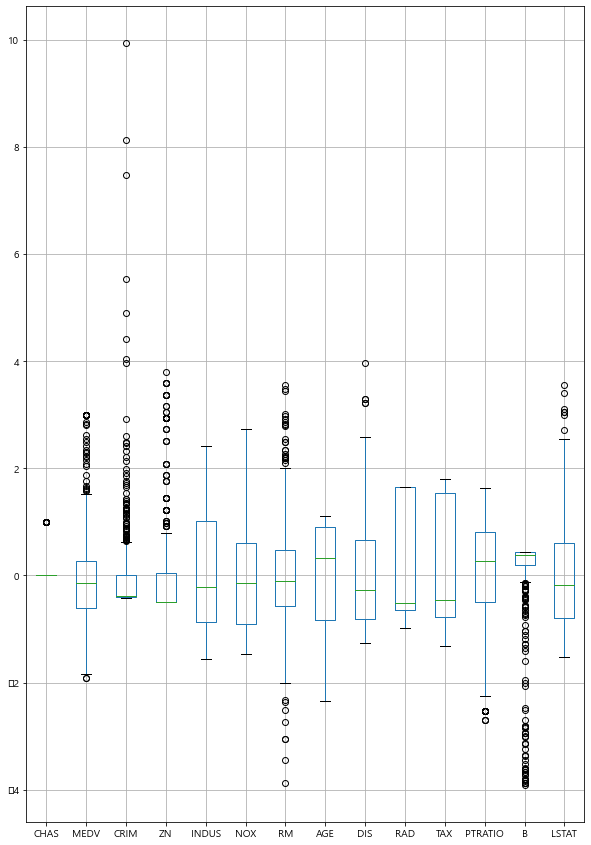

In [11]:
#이상치 찾기
df_dummy.boxplot(figsize = (10,15))

In [15]:
df_dummy.describe()

,CHAS,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.069170,-0.000014,0.000010,-0.000166,0.000051,0.000038,-0.000020,-0.000061,-0.000030,-0.000079,0.000038,0.000128,-0.000008,0.000016
std,0.253994,1.000960,1.000987,1.001120,1.001001,1.000957,1.001008,1.000945,1.000957,1.000901,1.001000,1.000944,1.000961,1.001013
min,0.000000,-1.908000,-0.420000,-0.488000,-1.558000,-1.466000,-3.880000,-2.335000,-1.267000,-0.983000,-1.314000,-2.707000,-3.907000,-1.531000
25%,0.000000,-0.599250,-0.411000,-0.488000,-0.868000,-0.913000,-0.568250,-0.837250,-0.805750,-0.638000,-0.768000,-0.488000,0.205500,-0.799250
50%,0.000000,-0.145000,-0.390500,-0.488000,-0.211000,-0.144000,-0.108500,0.317000,-0.279000,-0.523000,-0.465000,0.275000,0.381000,-0.181000
75%,0.000000,0.269000,0.007750,0.049000,1.016000,0.599000,0.482750,0.907000,0.662750,1.661000,1.531000,0.807000,0.433750,0.603250
max,1.000000,2.989000,9.934000,3.804000,2.423000,2.732000,3.555000,1.117000,3.961000,1.661000,1.798000,1.639000,0.441000,3.549000


In [16]:
df_dummy = df_dummy[df_dummy["B"] >= 0.2055]
df_dummy = df_dummy[df_dummy["CRIM"] <= 0.008]
df_dummy = df_dummy[df_dummy["RM"] >= -0.568250]
df_dummy = df_dummy[df_dummy["ZN"] <= 0.01]

<AxesSubplot:>

C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


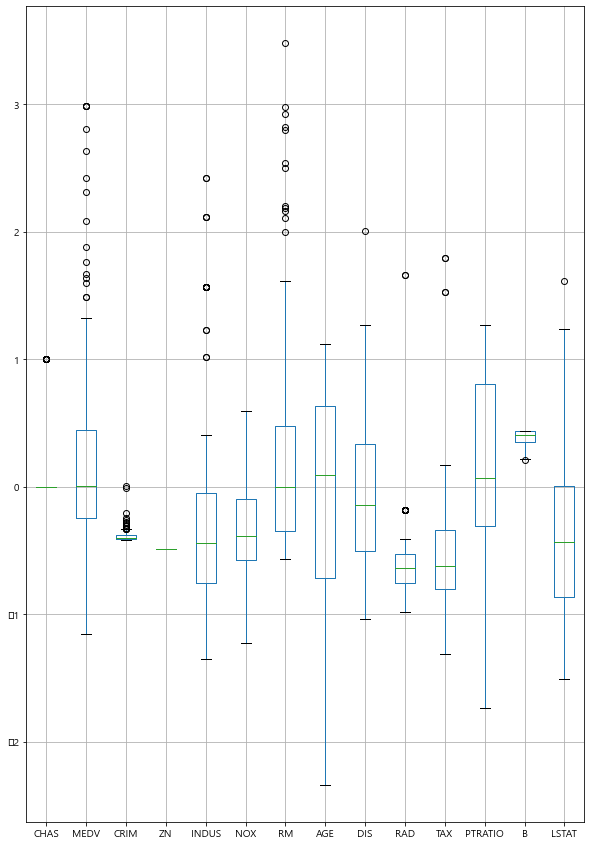

In [17]:
#이상치 찾기
df_dummy.boxplot(figsize = (10,15))

In [18]:
df_dummy.describe()

,CHAS,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,0.073826,0.233107,-0.384235,-4.880000e-01,-0.250799,-0.343416,0.250389,-0.102336,-0.037530,-0.563148,-0.553523,0.153027,0.383906,-0.395523
std,0.262369,0.842261,0.057460,3.341902e-16,0.849895,0.451824,0.848033,0.907220,0.602905,0.326528,0.543630,0.727600,0.064151,0.600262
min,0.000000,-1.157000,-0.418000,-4.880000e-01,-1.349000,-1.224000,-0.565000,-2.335000,-1.038000,-0.983000,-1.308000,-1.736000,0.213000,-1.504000
25%,0.000000,-0.243000,-0.412000,-4.880000e-01,-0.755000,-0.576000,-0.347000,-0.714000,-0.506000,-0.753000,-0.803000,-0.303000,0.350000,-0.865000
50%,0.000000,0.007000,-0.404000,-4.880000e-01,-0.437000,-0.386000,0.002000,0.097000,-0.143000,-0.638000,-0.619000,0.067000,0.404000,-0.435000
75%,0.000000,0.443000,-0.380000,-4.880000e-01,-0.048000,-0.092000,0.475000,0.637000,0.336000,-0.523000,-0.334000,0.807000,0.441000,0.011000
max,1.000000,2.989000,0.007000,-4.880000e-01,2.423000,0.599000,3.477000,1.117000,2.005000,1.661000,1.798000,1.269000,0.441000,1.613000


In [21]:
df_dummy = df_dummy[df_dummy["RM"] <= 0.5]
df_dummy = df_dummy[df_dummy["INDUS"] <= -0.05]

<AxesSubplot:>

C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


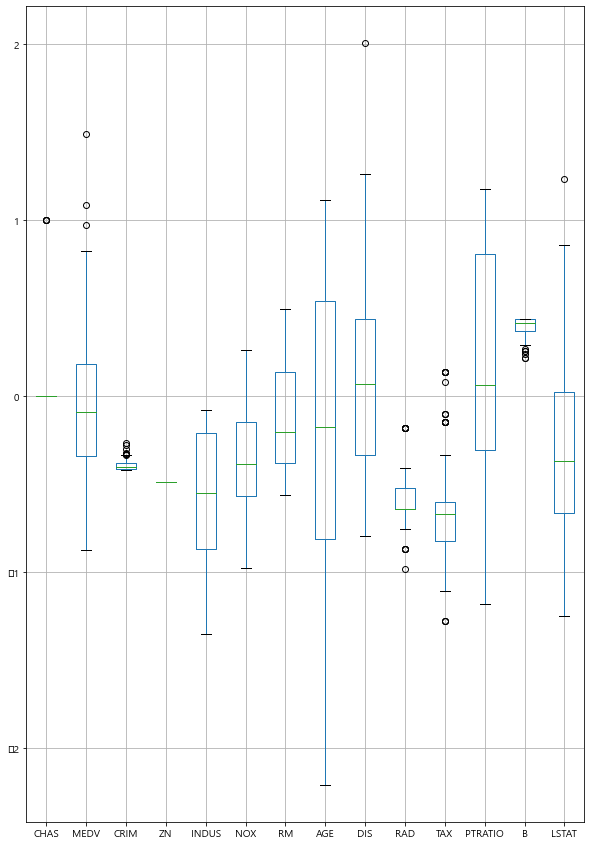

In [22]:
#이상치 찾기
df_dummy.boxplot(figsize = (10,15))

In [23]:
df_dummy.corr().round(3)

,CHAS,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CHAS,1.000,0.063,0.032,0.0,0.113,-0.077,0.012,0.160,-0.031,0.234,-0.026,-0.153,-0.138,0.323
MEDV,0.063,1.000,-0.271,0.0,-0.336,-0.359,0.468,-0.392,-0.114,0.066,-0.410,-0.435,-0.006,-0.512
CRIM,0.032,-0.271,1.000,-0.0,0.353,0.420,-0.114,0.288,-0.076,0.151,0.151,0.384,-0.265,0.218
ZN,0.000,0.000,-0.000,1.0,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000
INDUS,0.113,-0.336,0.353,-0.0,1.000,0.540,-0.255,0.203,-0.322,0.257,0.509,0.273,0.031,0.356
NOX,-0.077,-0.359,0.420,0.0,0.540,1.000,-0.202,0.413,-0.496,0.415,0.595,0.259,0.084,0.261
RM,0.012,0.468,-0.114,0.0,-0.255,-0.202,1.000,-0.003,0.003,-0.053,-0.081,-0.296,0.019,-0.509
AGE,0.160,-0.392,0.288,-0.0,0.203,0.413,-0.003,1.000,-0.505,0.063,0.395,0.082,0.033,0.562
DIS,-0.031,-0.114,-0.076,0.0,-0.322,-0.496,0.003,-0.505,1.000,-0.321,-0.496,0.140,-0.136,-0.281
RAD,0.234,0.066,0.151,-0.0,0.257,0.415,-0.053,0.063,-0.321,1.000,0.374,-0.008,-0.121,0.116


In [24]:
df_y = df_dummy["MEDV"]
df_x = df_dummy.drop("MEDV", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, train_size = 0.7, test_size = 0.3, random_state = 1234)

In [25]:
#회귀분석
lr_model = smf.ols(formula = "MEDV ~ PTRATIO + RAD + DIS + ZN + INDUS + NOX ", data = df_dummy)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     7.056
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           5.58e-06
Time:                        01:08:59   Log-Likelihood:                -27.781
No. Observations:                  82   AIC:                             69.56
Df Residuals:                      75   BIC:                             86.41
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0070      0.444     -0.016      0.9

In [ ]:
lr_model = smf.ols(formula = "MEDV ~ PTRATIO + RAD + DIS + ZN + INDUS + NOX + CRIM", data = df_dummy)
lr_result = lr_model.fit()
print(lr_result.summary())

In [114]:
df_raw = df_raw[df_raw["B"] >= 387]
df_raw = df_raw[df_raw["LSTAT"] < 17]
df_raw = df_raw[df_raw["ZN"] < 40]
df_raw = df_raw[df_raw["TAX"] <= 500]

df_raw.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


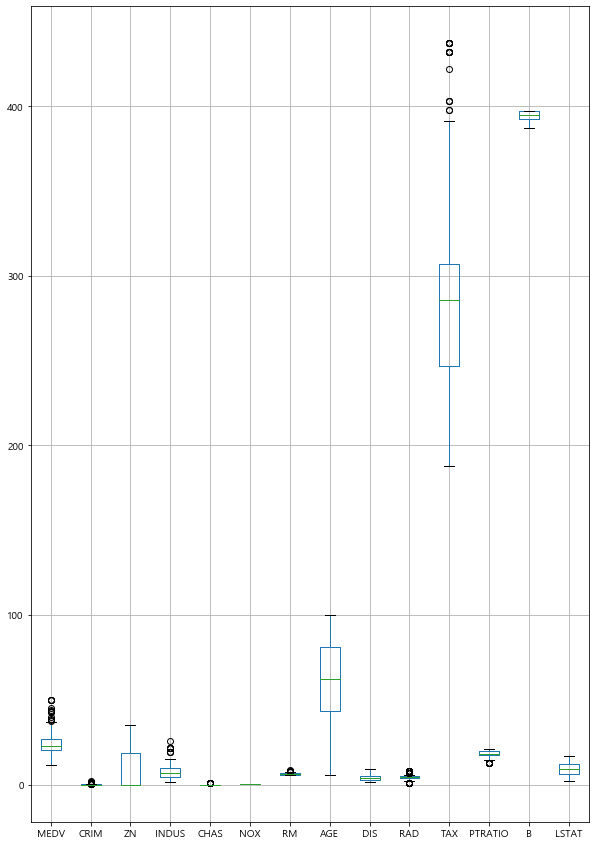

In [115]:
df_raw.boxplot(figsize = (10,15))

In [47]:
df_raw.corr().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000,0.176,0.195,-0.296,0.181,-0.028,0.861,-0.011,-0.092,0.025,-0.318,-0.501,-0.271,-0.651
CRIM,0.176,1.000,-0.122,0.375,0.268,0.524,0.150,0.361,-0.298,0.176,0.325,-0.182,-0.198,0.030
ZN,0.195,-0.122,1.000,-0.292,-0.060,-0.313,0.210,-0.282,0.398,0.240,-0.221,-0.319,-0.042,-0.195
INDUS,-0.296,0.375,-0.292,1.000,0.173,0.429,-0.216,0.247,-0.312,-0.033,0.547,0.238,0.012,0.359
CHAS,0.181,0.268,-0.060,0.173,1.000,0.084,0.164,0.141,-0.127,0.138,0.022,-0.146,-0.292,0.010
NOX,-0.028,0.524,-0.313,0.429,0.084,1.000,0.032,0.650,-0.719,0.045,0.391,-0.067,-0.180,0.265
RM,0.861,0.150,0.210,-0.216,0.164,0.032,1.000,0.137,-0.096,0.017,-0.160,-0.345,-0.251,-0.670
AGE,-0.011,0.361,-0.282,0.247,0.141,0.650,0.137,1.000,-0.661,-0.034,0.283,-0.004,-0.179,0.301
DIS,-0.092,-0.298,0.398,-0.312,-0.127,-0.719,-0.096,-0.661,1.000,0.100,-0.284,0.038,0.138,-0.185
RAD,0.025,0.176,0.240,-0.033,0.138,0.045,0.017,-0.034,0.100,1.000,0.291,-0.053,-0.109,0.059


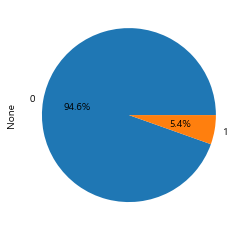

In [48]:
df_count = df_raw.groupby(["CHAS"]).size()
df_count.plot.pie(y = "MEDV", autopct = "%.1f%%")

In [49]:
#데이터 구성
df_y = df_raw["MEDV"]
df_x = df_raw.drop("MEDV", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, train_size = 0.7, test_size = 0.3, random_state = 1234)

In [51]:
#회귀분석
lr_model = smf.ols(formula = "MEDV ~ PTRATIO + LSTAT + TAX + RAD + DIS + RM + ZN + INDUS + NOX + CRIM", data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     90.39
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           2.66e-63
Time:                        21:24:09   Log-Likelihood:                -455.57
No. Observations:                 184   AIC:                             933.1
Df Residuals:                     173   BIC:                             968.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8498      6.087      0.633      0.5

In [53]:
#회귀분석
lr_model = smf.ols(formula = "MEDV ~ PTRATIO + TAX + DIS + RM + NOX + CRIM", data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     144.2
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           1.98e-65
Time:                        21:25:31   Log-Likelihood:                -460.67
No. Observations:                 184   AIC:                             935.3
Df Residuals:                     177   BIC:                             957.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2672      5.633      0.047      0.9

C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


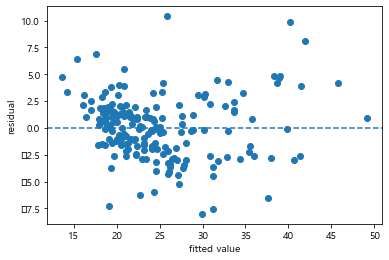

In [54]:
# 잔차 산점도: X-예측값, Y-잔차)
plt.scatter(lr_result.fittedvalues, lr_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")


C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


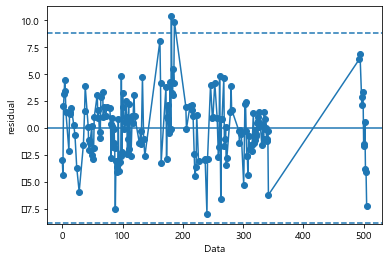

In [55]:
# 잔차의 독립성 확인
plt.plot(df_raw.index, lr_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "-")
plt.axhline(y = 3*np.std(lr_result.resid), linestyle = "--")
plt.axhline(y = -3*np.std(lr_result.resid), linestyle = "--")

In [57]:
# VIF 검사
df_raw_x = df_raw.drop("MEDV", axis =1)
df_raw_x_const = add_constant(df_raw_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i)for i in range(df_raw_x_const.shape[1])]
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
12,B,1.233
4,CHAS,1.313
9,RAD,1.397
11,PTRATIO,1.448
2,ZN,1.567
1,CRIM,1.783
10,TAX,1.914
3,INDUS,2.001
7,AGE,2.542
8,DIS,2.732


NormaltestResult(statistic=8.081407560973872, pvalue=0.01758509201497109)

C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


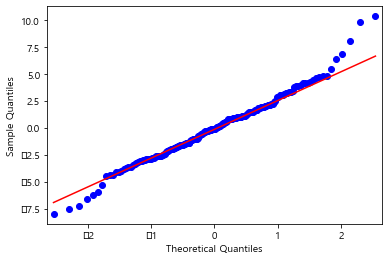

In [56]:
# 잔차 정규성 검정:Q-Q plot. s-standardized line (교재에는 없음)
qqplot(lr_result.resid, line = "q")
from statsmodels.stats.stattools import omni_normtest
omni_normtest(lr_result.resid, axis=0)

In [58]:
#회귀분석
lr_model = smf.ols(formula = "MEDV ~ PTRATIO + TAX + DIS + RM + NOX + CRIM", data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     144.2
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           1.98e-65
Time:                        21:30:07   Log-Likelihood:                -460.67
No. Observations:                 184   AIC:                             935.3
Df Residuals:                     177   BIC:                             957.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2672      5.633      0.047      0.9

In [117]:
lr_model = smf.ols(formula = "MEDV ~ PTRATIO + RAD + ZN + INDUS + NOX + CRIM", data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     14.09
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           4.36e-13
Time:                        23:22:50   Log-Likelihood:                -587.88
No. Observations:                 184   AIC:                             1190.
Df Residuals:                     177   BIC:                             1212.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.0850      7.075      8.210      0.0

In [118]:
lr_model = smf.ols(formula = "MEDV ~ RM + LSTAT + PTRATIO + TAX + INDUS + ZN + CHAS + B + CRIM", data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     91.33
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           3.58e-61
Time:                        23:29:57   Log-Likelihood:                -463.29
No. Observations:                 184   AIC:                             946.6
Df Residuals:                     174   BIC:                             978.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.5494     36.586      0.753      0.4

In [119]:
lr_model = smf.ols(formula = "MEDV ~ RM + PTRATIO + TAX + CRIM", data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     200.5
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           5.52e-65
Time:                        23:31:39   Log-Likelihood:                -467.28
No. Observations:                 184   AIC:                             944.6
Df Residuals:                     179   BIC:                             960.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.0453      4.126     -3.404      0.0

In [59]:
#모델 생성
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Scoring on training set: 1.000
Scoring on test set: 0.334


In [60]:
#파라미터 조정
train_score = []; test_score = []
para_leaf = [n_leaf*1for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234,
                                min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSampleLeaf"] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,1,1.000,0.334
1,2,0.978,0.562
2,3,0.966,0.569
3,4,0.939,0.585
4,5,0.926,0.642
5,6,0.916,0.621
6,7,0.897,0.591
7,8,0.896,0.621
8,9,0.893,0.627
9,10,0.885,0.589


In [61]:
train_score = []; test_score = []
para_split = [n_split*2for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234,
                                min_samples_leaf = 4 ,
                                min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split["MinSampleLeaf"] = para_split
df_score_split['TrainScore'] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,4,0.939,0.585
1,6,0.939,0.585
2,8,0.939,0.585
3,10,0.926,0.643
4,12,0.918,0.613
5,14,0.899,0.608
6,16,0.898,0.602
7,18,0.897,0.598
8,20,0.896,0.606
9,22,0.892,0.606


In [62]:
train_score = []; test_score = []
para_depth = [depth for depth in range(2, 20)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234,
                                min_samples_leaf = 4 ,
                                min_samples_split = 3,
                                max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["MinSampleLeaf"] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,2,0.833,0.581
1,3,0.886,0.607
2,4,0.907,0.624
3,5,0.923,0.609
4,6,0.931,0.585
5,7,0.935,0.599
6,8,0.937,0.597
7,9,0.939,0.585
8,10,0.939,0.585
9,11,0.939,0.585


In [64]:
#최종 식
dt_model = DecisionTreeRegressor(min_samples_leaf = 4, min_samples_split = 3, max_depth = 5, random_state = 1234,)
dt_model.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(dt_model.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(dt_model.score(df_test_x, df_test_y)))

Scoring on training set: 0.923
Scoring on test set: 0.609


In [66]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = dt_model.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,RM,0.839
12,LSTAT,0.068
10,PTRATIO,0.027
11,B,0.023
2,INDUS,0.015
7,DIS,0.013
9,TAX,0.012
6,AGE,0.003
0,CRIM,0.000
1,ZN,0.000


Text(0, 0.5, '변수')

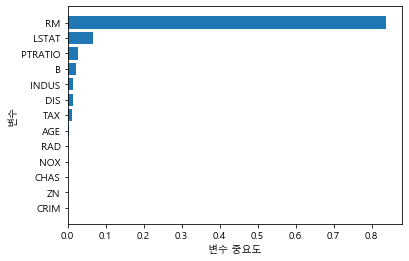

In [67]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [68]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Scoring on training set: 0.978
Scoring on test set: 0.770


In [69]:
train_score = []; test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state = 1234,
                                n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.965,0.793
1,20,0.973,0.779
2,30,0.975,0.783
3,40,0.976,0.774
4,50,0.977,0.763
5,60,0.977,0.760
6,70,0.977,0.763
7,80,0.978,0.768
8,90,0.978,0.772
9,100,0.978,0.770


In [71]:
train_score = []; test_score = []
para_leaf = [n_leaf*1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234,
                                n_estimators = 30,
                              min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.975,0.783
1,2,0.964,0.788
2,3,0.951,0.774
3,4,0.938,0.760
4,5,0.923,0.738
5,6,0.908,0.720
6,7,0.893,0.704
7,8,0.870,0.662
8,9,0.849,0.633
9,10,0.837,0.615


In [73]:
train_score = []; test_score = []
para_split = [n_split*2for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state = 1234,
                                n_estimators = 30 ,
                                min_samples_split = v_min_samples_split,
                              min_samples_leaf = 2)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split["MinSampleSplit"] = para_split
df_score_split['TrainScore'] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSampleSplit,TrainScore,TestScore
0,4,0.964,0.788
1,6,0.954,0.781
2,8,0.948,0.786
3,10,0.937,0.772
4,12,0.925,0.756
5,14,0.906,0.740
6,16,0.886,0.705
7,18,0.862,0.672
8,20,0.856,0.661
9,22,0.855,0.661


In [74]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234,
                                min_samples_leaf = 2 ,
                                min_samples_split = 4,
                                max_depth = v_max_depth,
                              n_estimators = 30)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.732,0.519
1,2,0.871,0.694
2,3,0.916,0.751
3,4,0.940,0.773
4,5,0.951,0.784
5,6,0.956,0.781
6,7,0.961,0.788
7,8,0.963,0.785
8,9,0.964,0.785
9,10,0.963,0.786


In [75]:
rf_model = RandomForestRegressor(min_samples_leaf = 2, min_samples_split = 4, max_depth = 6, random_state = 1234, n_estimators = 30)
rf_model.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(rf_model.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(rf_model.score(df_test_x, df_test_y)))

Scoring on training set: 0.956
Scoring on test set: 0.781


In [76]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_model.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,RM,0.803
12,LSTAT,0.072
6,AGE,0.024
10,PTRATIO,0.020
2,INDUS,0.019
9,TAX,0.018
7,DIS,0.016
4,NOX,0.009
0,CRIM,0.008
11,B,0.007


Text(0, 0.5, '변수')

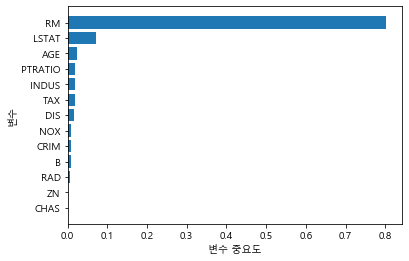

In [77]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [78]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Scoring on training set: 0.997
Scoring on test set: 0.814


In [80]:
train_score = []; test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1, 21)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 1234,
                                n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.812,0.583
1,20,0.942,0.746
2,30,0.971,0.787
3,40,0.982,0.805
4,50,0.988,0.808
5,60,0.991,0.809
6,70,0.993,0.810
7,80,0.995,0.811
8,90,0.996,0.813
9,100,0.997,0.814


In [81]:
train_score = []; test_score = []
para_leaf = [n_leaf*1 for n_leaf in range(1, 41)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state = 1234,
                                n_estimators = 130,
                              min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.998,0.814
1,2,0.998,0.836
2,3,0.998,0.826
3,4,0.998,0.837
4,5,0.996,0.826
5,6,0.996,0.844
6,7,0.993,0.828
7,8,0.992,0.830
8,9,0.989,0.811
9,10,0.989,0.813


In [83]:
train_score = []; test_score = []
para_split = [n_split*2 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state = 1234,
                                  n_estimators = 130,
                                  min_samples_leaf = 6 ,
                                  min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split["MinSampleSplit"] = para_split
df_score_split['TrainScore'] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSampleSplit,TrainScore,TestScore
0,2,0.996,0.844
1,4,0.996,0.844
2,6,0.996,0.844
3,8,0.996,0.844
4,10,0.996,0.844
5,12,0.996,0.844
6,14,0.995,0.830
7,16,0.993,0.832
8,18,0.993,0.825
9,20,0.992,0.839


In [84]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 40)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state = 1234,
                                min_samples_leaf = 6 ,
                                min_samples_split = 12,
                                max_depth = v_max_depth,
                                  n_estimators = 130)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.947,0.818
1,2,0.985,0.839
2,3,0.996,0.844
3,4,0.998,0.846
4,5,0.999,0.856
5,6,1.000,0.863
6,7,1.000,0.858
7,8,1.000,0.855
8,9,1.000,0.856
9,10,1.000,0.859


In [87]:
train_score = []; test_score = []
para_lr = [lr*0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state = 1234,
                                   min_samples_leaf = 6,
                                   min_samples_split = 12,
                                   max_depth = 10,
                                   n_estimators = 130,
                                   learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr["TestScore"] = test_score
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,1.0,0.859
1,0.2,1.0,0.837
2,0.3,1.0,0.867
3,0.4,1.0,0.849
4,0.5,1.0,0.825
5,0.6,1.0,0.784
6,0.7,1.0,0.804
7,0.8,1.0,0.806
8,0.9,1.0,0.738


In [88]:
gb_model = GradientBoostingRegressor(min_samples_leaf = 6, min_samples_split = 12, max_depth = 10, learning_rate = 0.3, random_state = 1234, n_estimators = 130)
gb_model.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(gb_model.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(gb_model.score(df_test_x, df_test_y)))

Scoring on training set: 1.000
Scoring on test set: 0.867


In [90]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_model.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,RM,0.812
12,LSTAT,0.048
9,TAX,0.027
10,PTRATIO,0.024
6,AGE,0.022
7,DIS,0.020
2,INDUS,0.015
11,B,0.012
4,NOX,0.009
8,RAD,0.005


Text(0, 0.5, '변수')

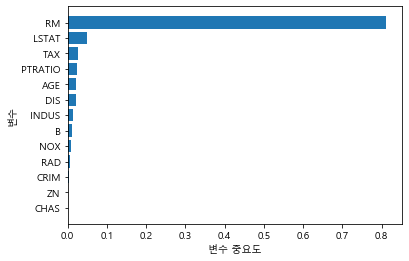

In [91]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [107]:
models = ["회귀분석", "의사결정나무" , "랜덤 포레스트", "그래디언트 부스팅"]
mse, rmse, mae, mape = [], [], [], []

In [100]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred) / y_true)) * 100

In [109]:
lr_y_pred = lr_result.predict(df_test_x)
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

dt_y_pred = dt_model.predict(df_test_x)
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

rf_y_pred = rf_model.predict(df_test_x)
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

gb_y_pred = gb_model.predict(df_test_x)
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

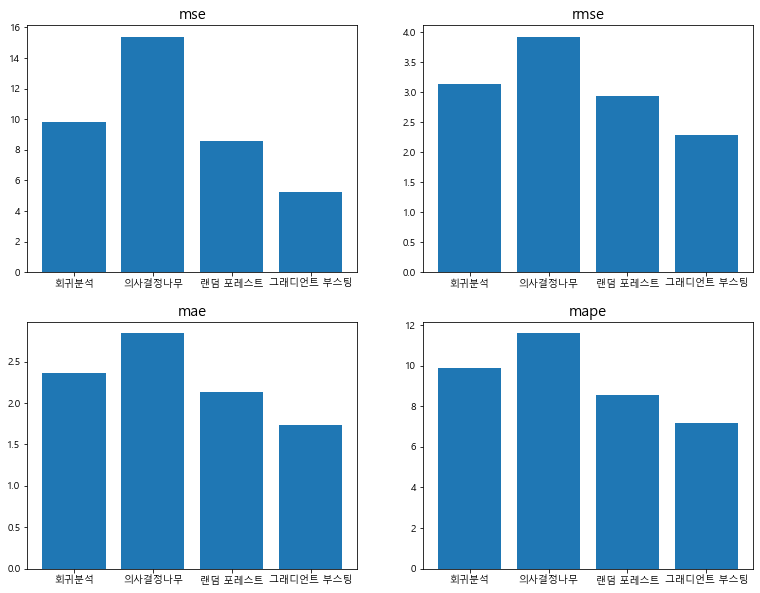

In [111]:
fig, ax = plt.subplots(2,2, figsize = (13, 10))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape").set_fontsize(15)

In [ ]:
df_raw = pd.read_csv("BOSTON_HOUSING.csv")
df = 